## Подготовка данных

### Откроем и изучим данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats as st
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
print(data_train.info())
print(data_train.head(10))
print('Дубликатов:', data_train.duplicated().sum())
print('Размер датасета:', data_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [3]:
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
print(data_test.info())
print(data_test.head(10))
print('Дубликатов:', data_test.duplicated().sum())
print('Размер датасета:', data_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [4]:
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
print(data_full.info())
print(data_full.head(10))
print('Дубликатов:', data_full.duplicated().sum())
print('Размер датасета:', data_full.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


### Проверим, что эффективность обогащения рассчитана правильно

In [5]:
# рассчитаем recovery
recovery = (data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']) / data_train['rougher.input.feed_au'] 
                        / (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']) * 100)

print('Эффективность обогащения чернового концентрата', recovery)
print('Абсолютная средняя ошибка =', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

Эффективность обогащения чернового концентрата 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64
Абсолютная средняя ошибка = 1.0748911125799084e-14


<b>Вывод: </b> Значения МАЕ близки к 0. Значит эффективность обогащения рассчитана правильно.

### Проанализирем признаки, недоступные в тестовой выборке

In [6]:
# копируем data_train для анализа
data_train_copy = data_train.copy()

In [7]:
# убираем признаки из data_train, которые есть в data_test
data_train_copy = data_train_copy.drop(columns=list(data_test.columns))

In [8]:
print(data_train_copy.info())
print(data_train_copy.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


<b>Вывод: </b> Некоторые параметры недоступны т.к. рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Скорее всего столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output отсутсвуют в тестовой выборке т.к. заполняются после тех. процессов

### Проведем предобработку данных

In [9]:
# проверим количесто пропусков
print(data_train.isna().sum())


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


In [10]:
# проверим количесто пропусков
print(data_test.isna().sum())


date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [11]:
# проверим количесто пропусков
print(data_full.isna().sum())


date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


In [12]:
# Заполним пропуски ближайшими значениями
data_train = data_train.fillna(method='bfill')
data_test = data_test.fillna(method='bfill')
data_full = data_full.fillna(method='bfill')

In [13]:
#data_train = data_train.drop(['date'], axis=1)
#data_test = data_test.drop(['date'], axis=1)

<b>Вывод: </b> Обработали пропуски - заменили на ближайшие значения. В дальнейшем в обучающей вывборки удалим признаки, отсутсвующие в тестовой выборке, чтобы избежать некорректных предсказаний. 

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки

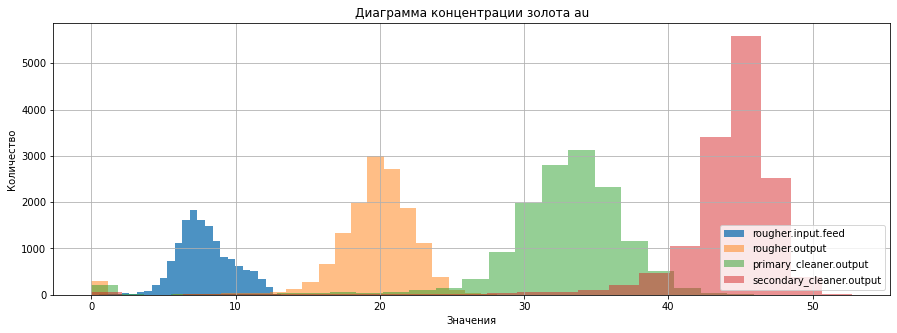

In [14]:
# Золото
plt.figure(figsize=(15,5))
data_train['rougher.input.feed_au'].hist(bins=25, label='rougher.input.feed', alpha=0.8)
data_train['rougher.output.concentrate_au'].hist(bins=25, label='rougher.output', alpha=0.5)
data_train['primary_cleaner.output.concentrate_au'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_train['final.output.concentrate_au'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации золота au')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend(loc='lower right')
plt.show()

Концентарция золота повышается на каждом этапе обработки сырья

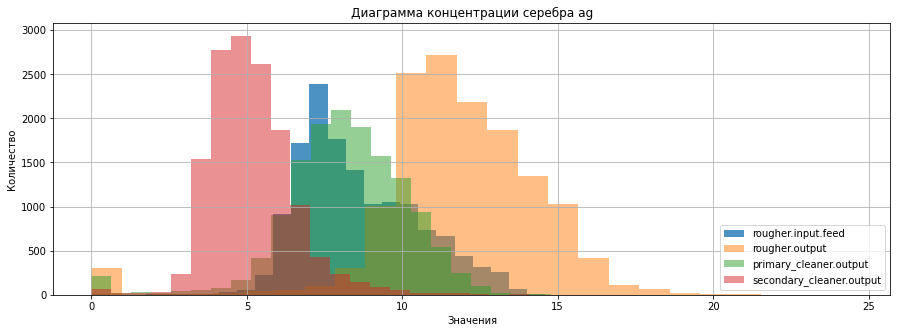

In [16]:
# Серебро
plt.figure(figsize=(15,5))
data_train['rougher.input.feed_ag'].hist(bins=25, label='rougher.input.feed', alpha=0.8)
data_train['rougher.output.concentrate_ag'].hist(bins=25, label='rougher.output', alpha=0.5)
data_train['primary_cleaner.output.concentrate_ag'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_train['final.output.concentrate_ag'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации серебра ag')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend(loc='lower right')
plt.show()

После первого этапа концентрация серебра увеличивается, потом уменьшается.

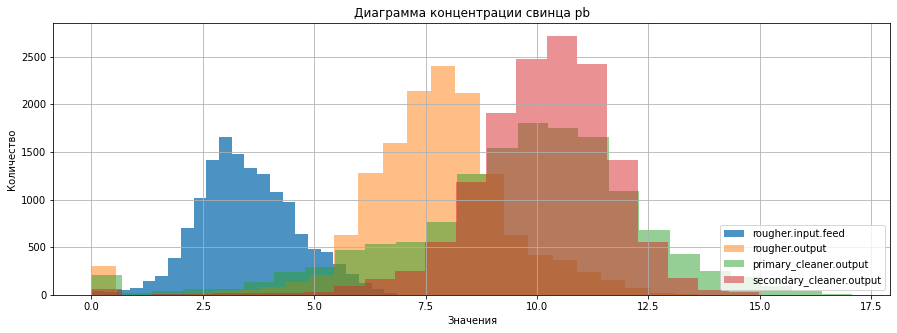

In [18]:
# Свинец
plt.figure(figsize=(15,5))
data_train['rougher.input.feed_pb'].hist(bins=25, label='rougher.input.feed', alpha=0.8)
data_train['rougher.output.concentrate_pb'].hist(bins=25, label='rougher.output', alpha=0.5)
data_train['primary_cleaner.output.concentrate_pb'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_train['final.output.concentrate_pb'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)
plt.title('Диаграмма концентрации свинца pb')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend(loc='lower right')
plt.show()

Концентарция свинца увеличивается

### Распределение размеров гранул сырья на обучающей и тестовой выборках

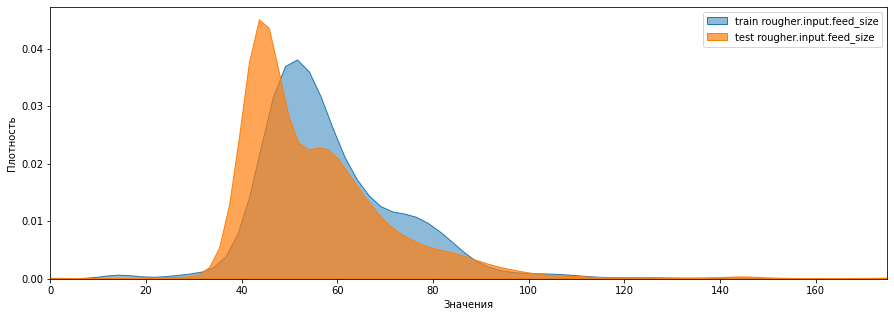

In [20]:
# Визуализация концентрации размера гранул сырья на входе флотации train и test
plt.figure(figsize=(15, 5))
sns.kdeplot(data_train['rougher.input.feed_size'], label='train rougher.input.feed_size', alpha=0.5, shade=True)
sns.kdeplot(data_test['rougher.input.feed_size'], label='test rougher.input.feed_size', alpha=0.7, shade=True)
plt.xlim([0, 175])
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend(loc='upper right')
plt.show()

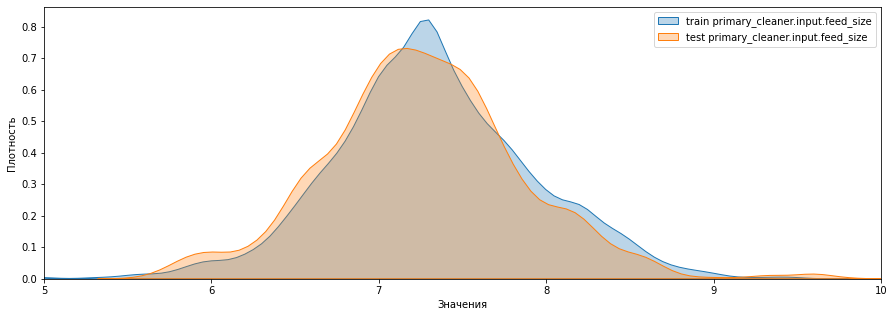

In [21]:
# Визуализация концентрации размера гранул сырья на входе финальной очистки train и test
plt.figure(figsize=(15, 5))
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], label='train primary_cleaner.input.feed_size', alpha=0.3, shade=True)
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], label='test primary_cleaner.input.feed_size', alpha=0.3, shade=True)
plt.xlim([5, 10])
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend(loc='upper right')
plt.show()

<b>Вывод: </b>Графики распределение размеров гранул сырья на входе в этапы флотации и финальной очистки на обучающей и тестовой выборках примерно похожи, следовательно данные не отличаются друг от друга, оценка модели будет нправильной.

### Суммарная концентрации всех веществ на разных стадиях

In [22]:
# суммарная концентрация всех веществ на стадии флотации
data_train['rougher.output.concentrate_sum'] = (data_train['rougher.output.concentrate_ag']+
                                                        data_train['rougher.output.concentrate_pb']+
                                                        data_train['rougher.output.concentrate_sol']+
                                                        data_train['rougher.output.concentrate_au'])

In [23]:
# суммарная концентрация всех веществ на стадии первичной очистки
data_train['primary_cleaner.output.concentrate_sum'] = (data_train['primary_cleaner.output.concentrate_ag']+
                                          data_train['primary_cleaner.output.concentrate_pb']+
                                          data_train['primary_cleaner.output.concentrate_sol']+
                                          data_train['primary_cleaner.output.concentrate_au'])

In [24]:
# суммарная концентрация всех веществ на стадии финальной очистки
data_train['final.output.concentrate_sum'] = (data_train['final.output.concentrate_ag']+
                                                      data_train['final.output.concentrate_pb']+
                                                      data_train['final.output.concentrate_sol']+
                                                      data_train['final.output.concentrate_au'])

In [25]:
# суммарная концентрация всех веществ в исходном сырье
data_train['rougher.input.feed_sum'] = (data_train['rougher.input.feed_ag']+
                                                      data_train['rougher.input.feed_pb']+
                                                      data_train['rougher.input.feed_sol']+
                                                      data_train['rougher.input.feed_au'])

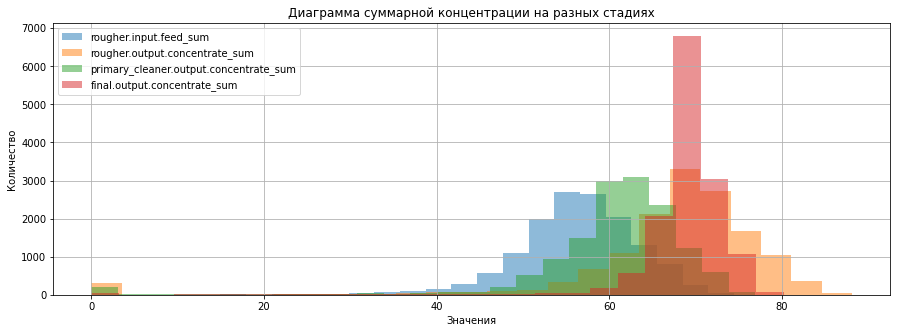

In [27]:
# Визуализация суммарной концентрации на разных стадиях
plt.figure(figsize=(15,5))
data_train['rougher.input.feed_sum'].hist(bins=25, label='rougher.input.feed_sum', alpha=0.5)
data_train['rougher.output.concentrate_sum'].hist(bins=25, label='rougher.output.concentrate_sum', alpha=0.5)
data_train['primary_cleaner.output.concentrate_sum'].hist(bins=25, label='primary_cleaner.output.concentrate_sum', alpha=0.5)
data_train['final.output.concentrate_sum'].hist(bins=25, label='final.output.concentrate_sum', alpha=0.5)
plt.title('Диаграмма суммарной концентрации на разных стадиях')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend(loc='upper left')
plt.show()

Наблюдается много аномалий в нулевых значениях, можно их удалить.

In [28]:
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_sum'] == 0].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_sum'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_sum'] == 0].index)
data_train = data_train.drop(data_train[data_train['rougher.input.feed_sum'] == 0].index)

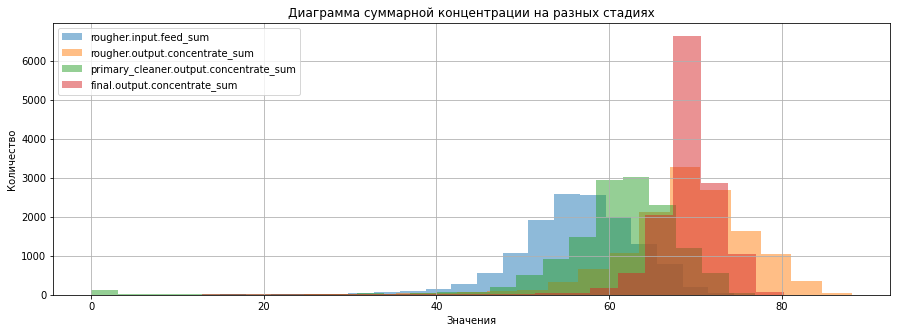

In [30]:
# Визуализация суммарной концентрации на разных стадиях после удаления выбросов
plt.figure(figsize=(15,5))
data_train['rougher.input.feed_sum'].hist(bins=25, label='rougher.input.feed_sum', alpha=0.5)
data_train['rougher.output.concentrate_sum'].hist(bins=25, label='rougher.output.concentrate_sum', alpha=0.5)
data_train['primary_cleaner.output.concentrate_sum'].hist(bins=25, label='primary_cleaner.output.concentrate_sum', alpha=0.5)
data_train['final.output.concentrate_sum'].hist(bins=25, label='final.output.concentrate_sum', alpha=0.5)
plt.title('Диаграмма суммарной концентрации на разных стадиях')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.legend(loc='upper left')
plt.show()

<b>Вывод: </b>

<p>Анализ концентрации металлов показал, что концентрация золота увеличивается на каждом этапе обработки сырья. Концентрации серебра после первого и второго этапа очистки уменьшается. Концентарция свинца увеличивается.
<p>Графики распределение размеров гранул сырья на входе в этапы флотации и финальной очистки на обучающей и тестовой выборках примерно похожи, следовательно данные не отличаются друг от друга, оценка модели будет нправильной.
<p>Расчитана суммарная концентрации всех веществ на разных стадиях

## Модель

### Функция для вычисления итоговой sMAPE

In [31]:
def smape(target, pred):
    error = np.mean(abs(target - pred)/((abs(target)+abs(pred))/2))*100
    return error

In [32]:
def smape_sum(smape_rougher,smape_final):
    return (0.25*smape_rougher + 0.75*smape_final)

In [33]:
# убираем отсутсвующие данные в test из train
data_train_off_test = set(data_train.columns) - set(data_test.columns)
target_off = data_train_off_test - set(['final.output.recovery', 'rougher.output.recovery'])
data_train = data_train.drop(columns=target_off, axis=1) 

In [34]:
# признаки для модели
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']
features_train = data_train.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1) 

### Линейная регрессия

In [35]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [36]:
#инициируем модель линейной регрессии
model_lr = LinearRegression()

In [37]:
#оценим модель с помощью кроссвалидации. Вычислим score_rougher
scores_lr_rougher = cross_val_score(model_lr, features_train, target_train_rougher, cv=5, scoring=smape_scorer)
smape_rougher = np.mean(abs(scores_lr_rougher))
print('Средняя оценка качества модели:', round(smape_rougher, 4))

Средняя оценка качества модели: 7.1831


In [38]:
#оценим модель с помощью кроссвалидации. Вычислим score_final
scores_lr_final = cross_val_score(model_lr, features_train, target_train_final, cv=5, scoring=smape_scorer)
smape_final = np.mean(abs(scores_lr_final))
print('Средняя оценка качества модели:', round(smape_final, 4))

Средняя оценка качества модели: 10.8899


In [39]:
#вычислим итоговую оценку sMape
smape_total = smape_sum(smape_rougher, smape_final)
print('Средняя итоговая оценка качества модели:', round(smape_total, 4))

Средняя итоговая оценка качества модели: 9.9632


Средняя итоговая оценка качества модели линейной регрессии 9,96

### Дерево решений

In [40]:
#этап rougher

#инициируем модель дерева решений
model_dtree_rougher = DecisionTreeRegressor(random_state=12345, max_depth=10)
#model_dtree_rougher.fit(features_train, target_train_rougher)

#оценим модель с помощью кроссвалидации. Вычислим sMape_rougher
scores_dtree_rougher = cross_val_score(model_dtree_rougher, features_train, target_train_rougher, cv=5, scoring=smape_scorer)
smape_rougher = np.mean(abs(scores_dtree_rougher))
print('Средняя оценка качества модели:', round(smape_rougher, 4))

Средняя оценка качества модели: 10.3216


In [41]:
#этап final

#инициируем модель дерева решений
model_dtree_final = DecisionTreeRegressor(random_state=12345, max_depth=10)
#model_dtree_final.fit(features_train, target_train_final)

#оценим модель с помощью кроссвалидации. Вычислим sMape_rougher
scores_dtree_final = cross_val_score(model_dtree_final, features_train, target_train_final, cv=5, scoring=smape_scorer)
smape_final = np.mean(abs(scores_dtree_final))
print('Средняя оценка качества модели:', round(smape_final, 4))

Средняя оценка качества модели: 13.6292


In [42]:
#вычислим итоговую оценку sMape
smape_total = smape_sum(smape_rougher, smape_final)
print('Средняя итоговая оценка качества модели:', round(smape_total, 4))

Средняя итоговая оценка качества модели: 12.8023


In [43]:
%%time
#находим параметры глубины дерева
model_dtree_rougher = DecisionTreeRegressor(random_state=12345)
parameters = {'max_depth': range(1, 30)}

grid_dt_rougher = GridSearchCV(model_dtree_rougher, parameters, cv=5, scoring=smape_scorer)
grid_dt_rougher.fit(features_train, target_train_rougher)

print(grid_dt_rougher.best_params_)
print('Значение smape_rougher:', abs(round(grid_dt_rougher.best_score_, 3)))

{'max_depth': 3}
Значение smape_rougher: 7.247
CPU times: user 1min 22s, sys: 226 ms, total: 1min 23s
Wall time: 1min 23s


In [44]:
%%time
#находим параметры глубины дерева
model_dtree_final = DecisionTreeRegressor(random_state=12345)
parameters = {'max_depth': range(1, 30)}

grid_dt_final = GridSearchCV(model_dtree_final, parameters, cv=5, scoring=smape_scorer)
grid_dt_final.fit(features_train, target_train_final)

print(grid_dt_final.best_params_)
print('Значение smape_final:', abs(round(grid_dt_final.best_score_, 3)))

{'max_depth': 2}
Значение smape_final: 9.553
CPU times: user 1min 26s, sys: 415 ms, total: 1min 27s
Wall time: 1min 27s


In [45]:
#находим итоговую оценку smape
smape_total = smape_sum(abs(round(grid_dt_rougher.best_score_, 3)), abs(round(grid_dt_final.best_score_, 3)))
print('Средняя итоговая оценка качества модели:', round(smape_total, 4))

Средняя итоговая оценка качества модели: 8.9765


Средняя итоговая оценка качества модели дерева решений 8,97

### Случайный лес

In [159]:
#этап rougher

model_rf_rougher = RandomForestRegressor(random_state=12345, max_depth=10, n_estimators=20)

#оценим модель с помощью кроссвалидации. Вычислим sMape_rougher
scores_rf_rougher = cross_val_score(model_rf_rougher, features_train, target_train_rougher, cv=5, scoring=smape_scorer)
smape_rf_rougher = np.mean(abs(scores_rf_rougher))
print('Средняя оценка качества модели:', round(smape_rf_rougher, 4))

Средняя оценка качества модели: 7.3284


In [160]:
#этап final

model_rf_final = RandomForestRegressor(random_state=12345, max_depth=10, n_estimators=20)

#оценим модель с помощью кроссвалидации. Вычислим sMape_rougher
scores_rf_final = cross_val_score(model_rf_final, features_train, target_train_final, cv=5, scoring=smape_scorer)
smape_rf_final = np.mean(abs(scores_rf_final))
print('Средняя оценка качества модели:', round(smape_rf_final, 4))

Средняя оценка качества модели: 9.746


In [161]:
#вычислим итоговую оценку smape_rf_total 
smape_rf_total = smape_sum(smape_rf_rougher, smape_rf_final)
print('Средняя итоговая оценка качества модели ', round(smape_rf_total, 4))

Средняя итоговая оценка качества модели  9.1416


In [162]:
%%time
#подберем параметры на этапе rougher

model_rf_rougher = RandomForestRegressor(random_state=12345)
parameters = { 'max_depth': range(1, 10, 2),
               'n_estimators': range(50, 250, 50)
             }

grid_rf_rougher = GridSearchCV(model_rf_rougher, parameters, cv=5, scoring=smape_scorer, n_jobs=-1)
grid_rf_rougher.fit(features_train, target_train_rougher)

print('Лучшие параметры: ', grid_rf_rougher.best_params_)
print('smape_rougher', abs(round(grid_rf_rougher.best_score_, 3)))

Лучшие параметры:  {'max_depth': 3, 'n_estimators': 200}
smape_rougher 6.566
CPU times: user 38min 9s, sys: 5.01 s, total: 38min 14s
Wall time: 38min 33s


Лучшие параметры:  {'max_depth': 3, 'n_estimators': 200}
smape_rougher 6.566
CPU times: user 38min 9s, sys: 5.01 s, total: 38min 14s
Wall time: 38min 33s

In [164]:
%%time
#подберем параметры на этапе final

model_rf_final = RandomForestRegressor(random_state=12345)

parameters = { 'max_depth': range(1, 10, 2),
               'n_estimators': range(50, 250, 50)
             }

grid_rf_final = GridSearchCV(model_rf_final, parameters, cv=5, scoring=smape_scorer, n_jobs=-1)
grid_rf_final.fit(features_train, target_train_final)

print('Лучшие параметры: ', grid_rf_final.best_params_)
print('smape_final', round(abs(grid_rf_final.best_score_), 3))

Лучшие параметры:  {'max_depth': 5, 'n_estimators': 50}
smape_final 9.161
CPU times: user 38min 18s, sys: 25.8 s, total: 38min 44s
Wall time: 39min 24s


Лучшие параметры:  {'max_depth': 5, 'n_estimators': 50}
smape_final 9.161
CPU times: user 38min 18s, sys: 25.8 s, total: 38min 44s
Wall time: 39min 24s

In [166]:
#вычислим итоговую оценку smape_rf_total 
smape_rf_total = smape_sum(abs(round(grid_rf_rougher.best_score_, 3)), abs(round(grid_rf_final.best_score_, 3)))
print('Средняя итоговая оценка качества модели:', round(smape_rf_total, 4))

Средняя итоговая оценка качества модели: 8.5122


<b>Вывод: </b> Лучший результат показала модель Случайного леса. Средняя итоговая оценка качества модели случаного леса 8,51 c параметрами:
<p>- для этапа rougher глубина 3, количество деревьев 200.
<p>- для этапа final глубина 5, количество деревьев 50.

### Проверка модели

In [167]:
#признаки для тестовой модели
test_frame_for_target = data_test.merge(data_full.loc[:,['date',"rougher.output.recovery","final.output.recovery"]],on = 'date')
features_test = test_frame_for_target.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
target_test_rougher = test_frame_for_target['rougher.output.recovery']
target_test_final = test_frame_for_target['final.output.recovery']

In [168]:
def model_best(features_train, target_train, features_test, depth, estimators):
    model_rf = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=estimators)
    model_rf.fit(features_train, target_train)
    pred_test_rf = model_rf.predict(features_test)
    return pred_test_rf

In [169]:
#спрогнозируем эффективность для этапа rougher
pred_test_rougher = model_best(features_train, target_train_rougher, features_test, 3, 200)

In [170]:
#спрогнозируем эффективность для этапа final
pred_test_final = model_best(features_train, target_train_final, features_test, 5, 50)

In [171]:
#рассчитаем smape на тестовых данных
smape_rougher = smape(target_test_rougher, pred_test_rougher)
smape_final = smape(target_test_final, pred_test_final)
smape_test = smape_sum(smape_rougher, smape_final)
print('Итоговая оценка smape на тестовых данных:', round(smape_test, 2))

Итоговая оценка smape на тестовых данных: 9.48


In [172]:
#проверка моделди на адекватность
def const_model(features_train, target_train, features_test):
    dummy_regr = DummyRegressor(strategy="mean")
    dummy_regr.fit(features_train, target_train)
    pred_test = dummy_regr.predict(features_test)
    return pred_test

In [173]:
#прогноз константной модели для этапа rougher
pred_test_rougher_const = const_model(features_train, target_train_rougher, features_test)

In [174]:
#прогноз константной модели для этапа final
pred_test_final_const = const_model(features_train, target_train_final, features_test)

In [175]:
#smape на тестовых данных
smape_rougher_test = smape(target_test_rougher, pred_test_rougher_const)
smape_final_test = smape(target_test_final, pred_test_final_const)
smape_test_const = smape_sum(smape_rougher_test, smape_final_test)
print('Итоговая оценка smape константной модели на тестовых данных:', round(smape_test_const, 2))

Итоговая оценка smape константной модели на тестовых данных: 9.83


<b>Вывод: </b> модель прошла проверку на адекватность. Результат константной модели хуже.

## Вывод

<p>В рамках предобработки данных проекта, изучены загруженные файлы.
<p>Проведен расчёт эффективности обогащения. Значения МАЕ близки к 0. Значит эффективность обогащения рассчитана правильно.
<p>Проанализированы поля недоступные в тестовой выборке. Некоторые параметры недоступны т.к. рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Скорее всего столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output отсутсвуют в тестовой выборке т.к. заполняются после тех. процессов    
<p>Провели предобработку данных. Проверили дубликаты, обработали пропуски.
<p>Анализ концентрации металлов показал, что концентрация золота увеличивается на каждом этапе обработки сырья. Концентрации серебра после первого и второго этапа очистки уменьшается. Концентарция свинца увеличивается.   
<p>Построены графики распределения плотности вероятности значений размеров гранул на входе в этапы флотации и финальной очистки выборок train и test. Графики примерно похожи, следовательно данные не отличаются друг от друга, оценка модели будет правильной.    
<p>Исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Удалены аномалии в нулевых значениях.
<p>Написана функция для вычисления итоговой sMAPE.  
<p>На данных train обучены модели линейной регрессии, дерева решений, а также случайного леса. Проведена оценка каждой модели. <p>Лучший результат показала модель Случайного леса с параметрами:
<p>- для этапа rougher глубина 3, количество деревьев 200.
<p>- для этапа final глубина 5, количество деревьев 50.
<p>Эти параметры позволяют получить на данных train показатель smape равный 8.51
<p>Итоговый расчёт на тестовых данных выбранной модели случайного леса позволил получить прогноз целевых признаков концентрации золота для этапа флотации и финальной очистки с показателем smape равным 9.48
<p>Проведена проверка модели на адекватность. Итоговая оценка smape константной модели на тестовых данных равна 9.83